### Pandas DataFrame

판다스에서 데이터(테이블 형태 - DB | 엑셀 | CSV | JSON) 처리하는 가장 기본단위 자료구조
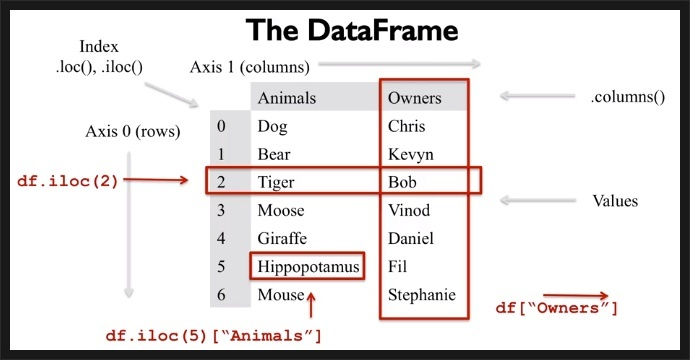

데이터프레임 생성

```py
pd.DataFrame(...)
```

In [1]:
import pandas as pd

In [3]:
# 데이터프레임 생성
data = {
    '이름': ['홍길동', '홍길순', '성유고', '박애슐'],
    '국어': [80, 100, 10, 90],
    '영어': [50, 100, 99, 100],
    '수학': [90, 100, 10, 40],
    '미술': [100, 100, 99, 30]
} # 기본데이터 실제로는 excel, db, csv, openAPI 등 다른곳에서 받아와서 처리

df1 = pd.DataFrame(data=data)
df1

,이름,국어,영어,수학,미술
0,홍길동,80,50,90,100
1,홍길순,100,100,100,100
2,성유고,10,99,10,99
3,박애슐,90,100,40,30


In [5]:
df2 = pd.DataFrame(data=data, columns=['이름','영어'])
df2

,이름,영어
0,홍길동,50
1,홍길순,100
2,성유고,99
3,박애슐,100


In [7]:
df3 = pd.DataFrame(data=data, columns=['이름','미술','음악'])
df3

,이름,미술,음악
0,홍길동,100,NaN
1,홍길순,100,NaN
2,성유고,99,NaN
3,박애슐,30,NaN


In [8]:
# 인덱스번호를 변경해서 DF 생성
df4 = pd.DataFrame(data=data, index=[x for x in range(1, len(data))])
df4

,이름,국어,영어,수학,미술
1,홍길동,80,50,90,100
2,홍길순,100,100,100,100
3,성유고,10,99,10,99
4,박애슐,90,100,40,30


In [9]:
df5 = pd.DataFrame(data=data, index=['첫번째','두번째','세번째','네번째'])
df5

,이름,국어,영어,수학,미술
첫번째,홍길동,80,50,90,100
두번째,홍길순,100,100,100,100
세번째,성유고,10,99,10,99
네번째,박애슐,90,100,40,30


### DF 내의 데이터 조회

In [11]:
df1['국어']

0     80
1    100
2     10
3     90
Name: 국어, dtype: int64

In [13]:
type(df1['국어'])

pandas.core.series.Series

In [14]:
df1[['이름','수학']]

,이름,수학
0,홍길동,90
1,홍길순,100
2,성유고,10
3,박애슐,40


In [15]:
type(df1[['이름','수학']])

pandas.core.frame.DataFrame

In [16]:
df1

,이름,국어,영어,수학,미술
0,홍길동,80,50,90,100
1,홍길순,100,100,100,100
2,성유고,10,99,10,99
3,박애슐,90,100,40,30


In [17]:
# DF의 인덱스 기준으로 데이터를 조회
df1.loc[1]

이름    홍길순
국어    100
영어    100
수학    100
미술    100
Name: 1, dtype: object

In [18]:
df1.loc[[0, 2]]

,이름,국어,영어,수학,미술
0,홍길동,80,50,90,100
2,성유고,10,99,10,99


In [19]:
df4

,이름,국어,영어,수학,미술
1,홍길동,80,50,90,100
2,홍길순,100,100,100,100
3,성유고,10,99,10,99
4,박애슐,90,100,40,30


In [20]:
# 지금 정해놓은 인덱스값 대로 조회
df4.loc[1]

이름    홍길동
국어     80
영어     50
수학     90
미술    100
Name: 1, dtype: object

In [21]:
# 원래의 인덱스값 대로 조회(아무리 인덱스를 변경해도 배열에서 첫번째인덱스가 0인것은 변함이 없음)
df4.iloc[0]

이름    홍길동
국어     80
영어     50
수학     90
미술    100
Name: 1, dtype: object

In [22]:
df5.loc['네번째']

이름    박애슐
국어     90
영어    100
수학     40
미술     30
Name: 네번째, dtype: object

In [23]:
df5.iloc[3]

이름    박애슐
국어     90
영어    100
수학     40
미술     30
Name: 네번째, dtype: object

In [24]:
# DF 슬라이싱(인덱스로)
df5[0:3]

,이름,국어,영어,수학,미술
첫번째,홍길동,80,50,90,100
두번째,홍길순,100,100,100,100
세번째,성유고,10,99,10,99


#### 특정데이터 상세 조회

In [26]:
df5.loc['세번째', ['미술']]

미술    99
Name: 세번째, dtype: object

In [27]:
df4.iloc[2, [4]]

미술    99
Name: 3, dtype: object

In [28]:
df5.loc['세번째', '미술']

99

In [29]:
df5.iloc[2, 4]

99

In [30]:
type(df5.iloc[2, 4])

numpy.int64

In [31]:
df5

,이름,국어,영어,수학,미술
첫번째,홍길동,80,50,90,100
두번째,홍길순,100,100,100,100
세번째,성유고,10,99,10,99
네번째,박애슐,90,100,40,30


In [32]:
# 한 컬럼에 조건걸어서 조회 --> 시리즈
df5['수학'] > 50

첫번째     True
두번째     True
세번째    False
네번째    False
Name: 수학, dtype: bool

In [33]:
# 조회조건이 참인 df만 출력
df5[df5['수학'] > 50]

,이름,국어,영어,수학,미술
첫번째,홍길동,80,50,90,100
두번째,홍길순,100,100,100,100


In [34]:
# AND 조회조건
df5[(df5['수학'] > 50) & (df5['국어'] > 80)]

,이름,국어,영어,수학,미술
두번째,홍길순,100,100,100,100


In [35]:
# OR 조회조건
df5[(df5['수학'] > 50) | (df5['국어'] > 80)]

,이름,국어,영어,수학,미술
첫번째,홍길동,80,50,90,100
두번째,홍길순,100,100,100,100
네번째,박애슐,90,100,40,30


In [36]:
# ISIN 조건
df5['영어'].isin([50, 99])

첫번째     True
두번째    False
세번째     True
네번째    False
Name: 영어, dtype: bool

In [37]:
df5[df5['영어'].isin([50, 99])]

,이름,국어,영어,수학,미술
첫번째,홍길동,80,50,90,100
세번째,성유고,10,99,10,99


#### DF 데이터 추가/변경/삭제

In [38]:
df5

,이름,국어,영어,수학,미술
첫번째,홍길동,80,50,90,100
두번째,홍길순,100,100,100,100
세번째,성유고,10,99,10,99
네번째,박애슐,90,100,40,30


In [39]:
# 컬럼이름 추가, 리스트로 데이터를 할당
# 똑같은 컬럼은 추가안됨
df5['음악'] = [70, 100, 30, 10]
df5

,이름,국어,영어,수학,미술,음악
첫번째,홍길동,80,50,90,100,70
두번째,홍길순,100,100,100,100,100
세번째,성유고,10,99,10,99,30
네번째,박애슐,90,100,40,30,10


In [40]:
# 연산후 컬럼 추가
df5['국어 + 10'] = df5['국어'] + 10
df5

,이름,국어,영어,수학,미술,음악,국어 + 10
첫번째,홍길동,80,50,90,100,70,90
두번째,홍길순,100,100,100,100,100,110
세번째,성유고,10,99,10,99,30,20
네번째,박애슐,90,100,40,30,10,100


In [41]:
# 실행할때마다 연산
df5['음악'] = df5['음악'] + 10
df5

,이름,국어,영어,수학,미술,음악,국어 + 10
첫번째,홍길동,80,50,90,100,80,90
두번째,홍길순,100,100,100,100,110,110
세번째,성유고,10,99,10,99,40,20
네번째,박애슐,90,100,40,30,20,100


In [42]:
# 조건식 + loc으로 컬럼값은 변경
df5.loc[df5['음악'] > 100, ['음악']] = 100
df5

,이름,국어,영어,수학,미술,음악,국어 + 10
첫번째,홍길동,80,50,90,100,80,90
두번째,홍길순,100,100,100,100,100,110
세번째,성유고,10,99,10,99,40,20
네번째,박애슐,90,100,40,30,20,100


In [43]:
del df5['국어 + 10']
df5

,이름,국어,영어,수학,미술,음악
첫번째,홍길동,80,50,90,100,80
두번째,홍길순,100,100,100,100,100
세번째,성유고,10,99,10,99,40
네번째,박애슐,90,100,40,30,20


In [44]:
# 특정위치 값 변경
df1.at[3, '미술'] = 40
df1

,이름,국어,영어,수학,미술
0,홍길동,80,50,90,100
1,홍길순,100,100,100,100
2,성유고,10,99,10,99
3,박애슐,90,100,40,40


#### 삭제 중 drop

In [46]:
# axis=1 한 컬럼을 기준으로 없앰
df7 = df1.drop(['미술'], axis=1)
df7

,이름,국어,영어,수학
0,홍길동,80,50,90
1,홍길순,100,100,100
2,성유고,10,99,10
3,박애슐,90,100,40


In [47]:
# axis=0 한 행을 다 없앰
df8 = df1.drop(3, axis=0)
df8

,이름,국어,영어,수학,미술
0,홍길동,80,50,90,100
1,홍길순,100,100,100,100
2,성유고,10,99,10,99


In [48]:
df10 = df1

In [49]:
# inplace 속성
df10.drop(3, axis=0, inplace=True)
df10

,이름,국어,영어,수학,미술
0,홍길동,80,50,90,100
1,홍길순,100,100,100,100
2,성유고,10,99,10,99


In [50]:
df10.drop(['미술'], axis=1, inplace=True)

In [51]:
df10

,이름,국어,영어,수학
0,홍길동,80,50,90
1,홍길순,100,100,100
2,성유고,10,99,10


기타 속성값

In [52]:
df1.index

RangeIndex(start=0, stop=3, step=1)

In [53]:
df5.index

Index(['첫번째', '두번째', '세번째', '네번째'], dtype='object')

In [54]:
df1.columns

Index(['이름', '국어', '영어', '수학'], dtype='object')

In [56]:
df4.values

array([['홍길동', 80, 50, 90, 100],
       ['홍길순', 100, 100, 100, 100],
       ['성유고', 10, 99, 10, 99],
       ['박애슐', 90, 100, 40, 30]], dtype=object)

In [57]:
# 제일 중요한 것 중 한 속성
df4.shape

(4, 5)

In [58]:
df4.size

20

In [59]:
df4.dtypes

이름    object
국어     int64
영어     int64
수학     int64
미술     int64
dtype: object

In [60]:
df4

,이름,국어,영어,수학,미술
1,홍길동,80,50,90,100
2,홍길순,100,100,100,100
3,성유고,10,99,10,99
4,박애슐,90,100,40,30


In [61]:
# DB에서 SQL로 이작업을 하려면 어렵다.
df4.T

,1,2,3,4
이름,홍길동,홍길순,성유고,박애슐
국어,80,100,10,90
영어,50,100,99,100
수학,90,100,10,40
미술,100,100,99,30


In [62]:
!pip install Jinja2


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
!pip install matplotlib

     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     - -------------------------------------- 0.4/7.5 MB 11.6 MB/s eta 0:00:01
     ----- ---------------------------------- 1.0/7.5 MB 12.5 MB/s eta 0:00:01
     --------- ------------------------------ 1.8/7.5 MB 14.3 MB/s eta 0:00:01
     --------------- ------------------------ 2.9/7.5 MB 16.9 MB/s eta 0:00:01
     ----------------------- ---------------- 4.4/7.5 MB 20.0 MB/s eta 0:00:01
     --------------------------------- ------ 6.3/7.5 MB 23.9 MB/s eta 0:00:01
     ---------------------------------------  7.5/7.5 MB 26.6 MB/s eta 0:00:01
     ---------------------------------------- 7.5/7.5 MB 24.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/470.9 kB ? eta -:--:--
     ------------------------------------- 470.9/470.9 kB 14.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     -------------


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
# 제일 많이 쓰는 것 중 하나
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      3 non-null      object
 1   국어      3 non-null      int64 
 2   영어      3 non-null      int64 
 3   수학      3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 228.0+ bytes


In [65]:
# EDA(Exploratory Data Analysis) 탐색적 데이터 분석 중 가장 기본
df5.describe()

,국어,영어,수학,미술,음악
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,70.000000,87.250000,60.000000,82.250000,60.000000
std,40.824829,24.837807,42.426407,34.836523,36.514837
min,10.000000,50.000000,10.000000,30.000000,20.000000
25%,62.500000,86.750000,32.500000,81.750000,35.000000
50%,85.000000,99.500000,65.000000,99.500000,60.000000
75%,92.500000,100.000000,92.500000,100.000000,85.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000
